# Analysis of IMR90 Datasets with Various Metrics and Norms

In [1]:
import sys
sys.path.append('../')

import numpy as np
from AnalysisTools import Ana, PlotHelper


# Initialize the analysis object
analysis = Ana(showPlots=True)

# Add datasets
analysis.add_dataset(label="IMR90SIM", folder="data/IMR90SIM")
analysis.add_dataset(label='IMR90OPT', folder='data/IMR90OPT')
analysis.add_dataset(label="IMR90OPT57", folder='data/IMR90OPT56')

# Process trajectories for each dataset
analysis.process_trajectories(label="IMR90SIM", filename="traj_chr_IMR90OPT_0.cndb", folder_pattern=['iteration_', [1, 20]])
analysis.process_trajectories(label="IMR90OPT", filename="traj_0.cndb", folder_pattern=['iteration_', [1, 20]])
analysis.process_trajectories(label="IMR90OPT57", filename="traj_0.cndb", folder_pattern=['iteration_', [1, 20]])

# Initialize PlotHelper
pl = PlotHelper()

2024-07-15 02:36:46.858027: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-15 02:36:46.876258: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-15 02:36:46.881894: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-15 02:36:46.894853: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-15 02:36:47.681739: W tensorflow/compiler/tf2

Processing file: data/IMR90SIM/iteration_1/traj_chr_IMR90OPT_0.cndb
Processing file: data/IMR90SIM/iteration_2/traj_chr_IMR90OPT_0.cndb
Processing file: data/IMR90SIM/iteration_3/traj_chr_IMR90OPT_0.cndb
Processing file: data/IMR90SIM/iteration_4/traj_chr_IMR90OPT_0.cndb
Processing file: data/IMR90SIM/iteration_5/traj_chr_IMR90OPT_0.cndb
Processing file: data/IMR90SIM/iteration_6/traj_chr_IMR90OPT_0.cndb
Processing file: data/IMR90SIM/iteration_7/traj_chr_IMR90OPT_0.cndb
Processing file: data/IMR90SIM/iteration_8/traj_chr_IMR90OPT_0.cndb
Processing file: data/IMR90SIM/iteration_9/traj_chr_IMR90OPT_0.cndb
Processing file: data/IMR90SIM/iteration_10/traj_chr_IMR90OPT_0.cndb
Processing file: data/IMR90SIM/iteration_11/traj_chr_IMR90OPT_0.cndb
Processing file: data/IMR90SIM/iteration_12/traj_chr_IMR90OPT_0.cndb
Processing file: data/IMR90SIM/iteration_13/traj_chr_IMR90OPT_0.cndb
Processing file: data/IMR90SIM/iteration_14/traj_chr_IMR90OPT_0.cndb
Processing file: data/IMR90SIM/iteration_15

## Spectral Clustering Analysis with Default Parameters

using cached data: /home/diego/Dev/OpenMiChroM-Ana/test/cache/cache_('IMR90OPT', 'IMR90OPT57', 'IMR90SIM', 'weighted', 'euclidean', 'ice').pkl.npz

Clustering Evaluation Metrics:
  Silhouette Score: 0.0341 (higher is better, range: [-1, 1])
  Calinski-Harabasz Index: 6.2191 (higher is better)
  Davies-Bouldin Index: 5.0573 (lower is better)

Plot saved as: /home/diego/Dev/OpenMiChroM-Ana/test/Analysis/spectral_clustering_plot.png


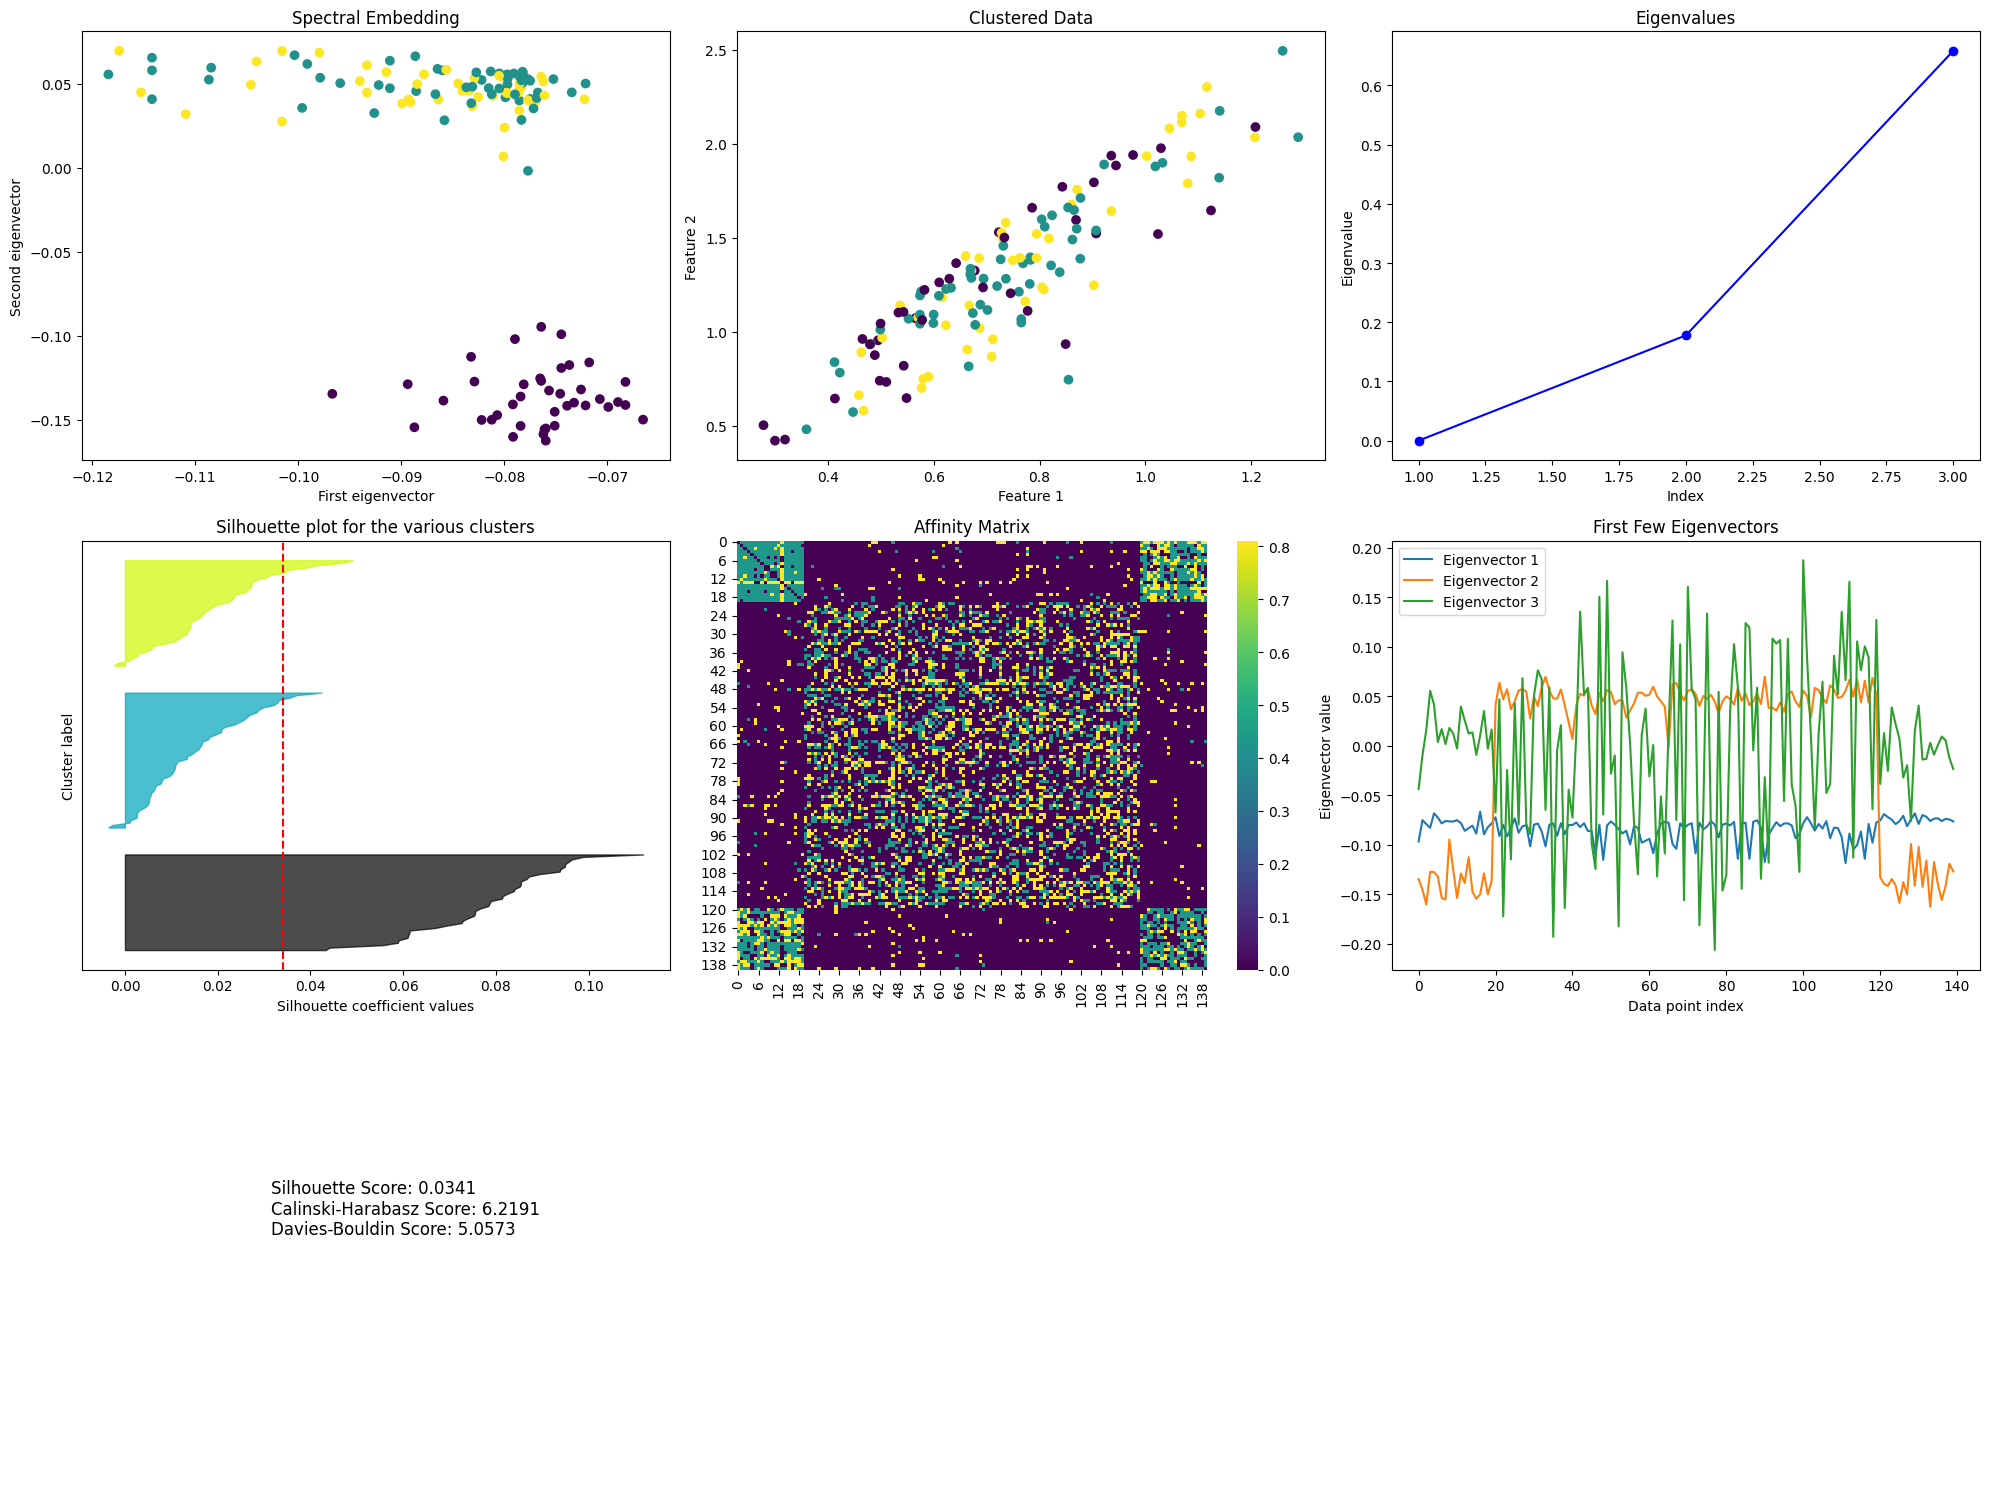

In [4]:
cluster_results_default = analysis.spectral_clustering("IMR90OPT", "IMR90SIM", "IMR90OPT57")
# pl.plot(plot_type="spectralclusteringplot", data=[X_default, cluster_results_default], plot_params={"title": "Default Spectral Clustering"})

## Spectral Clustering Analysis with Different Norms

In [5]:
norms = ["ice", "log_transform", "vc", "kr"]

for norm in norms:
    cluster_results_norm = analysis.spectral_clustering("IMR90OPT", "IMR90SIM", "IMR90OPT57", norm=norm)


TypeError: Ana.spectral_clustering() got an unexpected keyword argument 'norm'

## Spectral Clustering Analysis with Different Metrics

In [ ]:
metrics = ["euclidean", "pearsons", "spearman", "contact", "log2_contact"]

for metric in metrics:
    cluster_results_metric = analysis.spectral_clustering("IMR90OPT", "IMR90SIM", "IMR90OPT57", metric=metric)


## PCA Analysis

In [ ]:
prinComp_pca, expVarRatio_pca, fclust_pca = analysis.pca("IMR90OPT", "IMR90SIM", "IMR90OPT57")
pl.plot(plot_type="pcaplot", data=[prinComp_pca, expVarRatio_pca, fclust_pca], plot_params={"title": "PCA Plot"})

## t-SNE Analysis

In [ ]:
tsne_res, fclust_tsne = analysis.tsne("IMR90OPT", "IMR90SIM", "IMR90OPT57")
pl.plot(plot_type="tsneplot", data=[tsne_res, fclust_tsne], plot_params={"title": "t-SNE Plot"})

## UMAP Analysis

In [ ]:
umap_res, fclust_umap = analysis.umap("IMR90OPT", "IMR90SIM", "IMR90OPT57")
pl.plot(plot_type="umapplot", data=[umap_res, fclust_umap], plot_params={"title": "UMAP Plot"})

## IVIS Analysis

In [ ]:
ivis_res, fclust_ivis = analysis.ivis_clustering("IMR90OPT", "IMR90SIM", "IMR90OPT57")
pl.plot(plot_type="ivisplot", data=[ivis_res, fclust_ivis], plot_params={"title": "IVIS Plot"})

## Dendrogram

In [ ]:
Z_dendro = analysis.dendogram_Z("IMR90OPT", "IMR90SIM", "IMR90OPT57")
pl.plot(plot_type="dendrogram", data=Z_dendro, plot_params={"title": "Dendrogram"})

## Distance Map

In [ ]:
for dataset in ["IMR90OPT", "IMR90SIM", "IMR90OPT57"]:
    dist_map = analysis.dist_map(dataset)
    pl.plot(plot_type="euclidiandistmap", data=[dist_map], plot_params={"title": f"{dataset} Distance Map"})